# **Overfitting**

**Disclaimer**: large parts of the lab are taken from [this webpage](https://deeplearning.neuromatch.io/tutorials/W2D1_Regularization/student/W2D1_Tutorial1.html).

--> Not generalizing, but produce goods result in the training data and bad result in the test set of data

In [1]:
# Imports
import time
import copy
import torch
import pathlib

import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

from tqdm import tqdm

Let us create a synthetic _noisy_ dataset that we will use to illustrate overfitting in neural networks (the actual fit wuould be linear)!

**Question time**: do you know why we use the fixed seed?

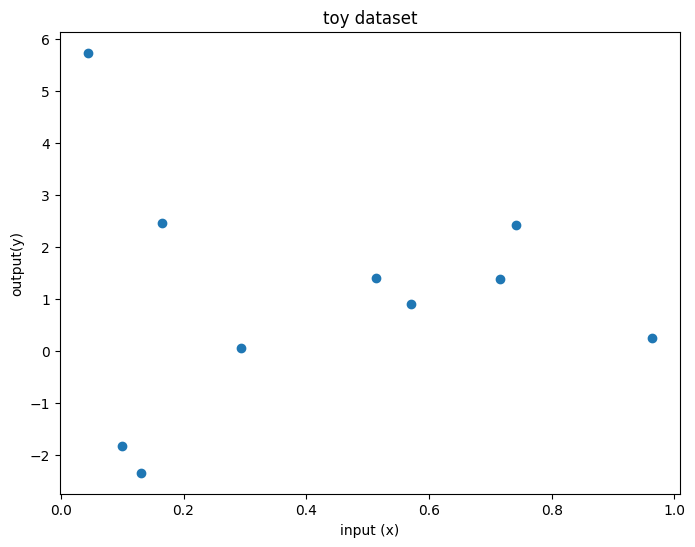

In [2]:
# I want to predit a line, I put the data in a line with a little bit of noise
# GOAL: predict the line

seed_num = 2021 # Put the seed
# If you use GPU you have to select the same seed for all 

torch.manual_seed(seed_num)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed_num)

# Creating train data
# Input
X = torch.rand((10, 1))
# Output
Y = 2*X + 2*torch.empty((X.shape[0], 1)).normal_(mean=0, std=1)  # Adding small error in the data
# Visualizing train data
plt.figure(figsize=(8, 6))
plt.scatter(X.numpy(),Y.numpy())
plt.xlabel('input (x)')
plt.ylabel('output(y)')
plt.title('toy dataset')
plt.show()

# Creating test dataset
X_test = torch.linspace(0, 1, 40)
X_test = X_test.reshape((40, 1, 1))

Let us build a _overparametrized_ structure by means of ``pytorch`` and define the optimizer and the parameters of our model.

In [3]:
# We build the net

class Net(nn.Module):
  """
  Network Class - 2D with following structure
  nn.Linear(1, 300) + leaky_relu(self.fc1(x)) # First fully connected layer
  nn.Linear(300, 500) + leaky_relu(self.fc2(x)) # Second fully connected layer
  nn.Linear(500, 1) # Final fully connected layer
  """

  def __init__(self): # Initialization of the nat
    """
    Initialize parameters of Net

    Args:
      None

    Returns:
      Nothing
    """
    super(Net, self).__init__()

    self.fc1 = nn.Linear(1, 300) # First connected layer
    self.fc2 = nn.Linear(300, 500)
    self.fc3 = nn.Linear(500, 1)

  def forward(self, x): # Produce the output, tells me how to pass the data
    """
    Forward pass of Net

    Args:
      x: torch.tensor
        Input features

    Returns:
      x: torch.tensor
        Output/Predictions
    """
    x = F.leaky_relu(self.fc1(x)) # Apply the Relu (activation function)
    x = F.leaky_relu(self.fc2(x))
    output = self.fc3(x)
    return output

In [4]:
torch.manual_seed(seed_num)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed_num)

# Train the network on toy dataset
model = Net()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4) # We use the ADAM algotithm

iters = 0
# Calculates frobenius before training
# normi, wsi, label = calculate_frobenius_norm(model)

Let us train our model!!

In [5]:
torch.manual_seed(seed_num)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed_num)

# Initializing variables
# Losses
train_loss = [] # Training
test_loss = [] # Validation

# Model norm
model_norm = []

# Initializing variables to store weights
norm_per_layer = []

max_epochs = 10000


for epoch in tqdm(range(max_epochs)):
  
  model.train()
  optimizer.zero_grad()
  predictions = model(X)
  loss = criterion(predictions, Y) # Discrepancy between the data and the prediction
  loss.backward()
  optimizer.step()

  train_loss.append(loss.data.item())
  model.eval()
  Y_test = model(X_test)
  loss = criterion(Y_test, 2*X_test) # 2*Xtest is the exact solution w.r.t. the test
  test_loss.append(loss.data.item())


100%|██████████████████████████████████████████████████████████| 10000/10000 [00:15<00:00, 635.29it/s]


Let us plot the loss of the train and of the test set... What are the conclusions about our prediction?

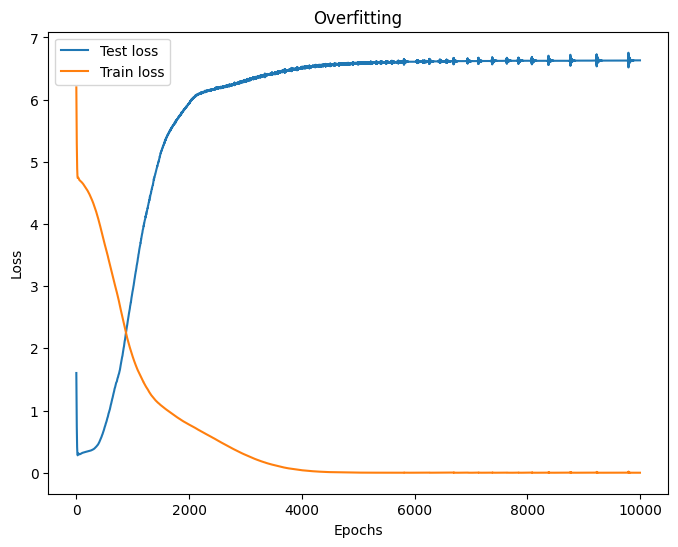

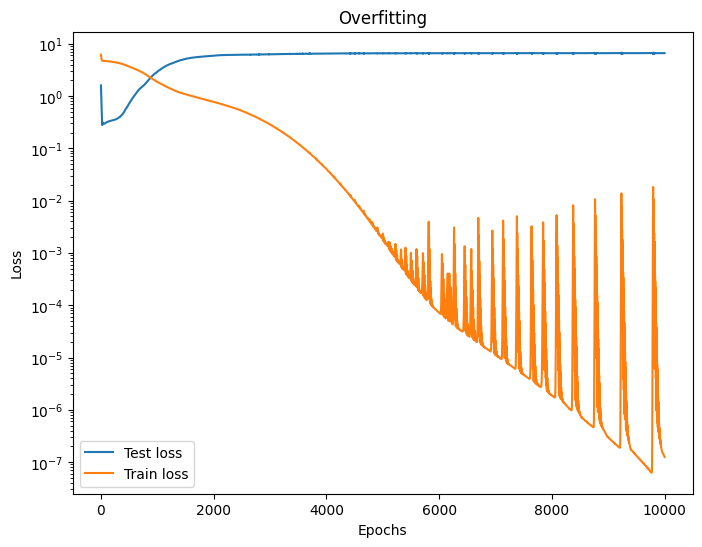

In [6]:
# Visualizing train data --> see the overfitting in the plot: the train has low error, the val high error
plt.figure(figsize=(8, 6))
epochs = np.arange(len(test_loss))

plt.plot(epochs,test_loss,label="Test loss")
plt.plot(epochs,train_loss,label="Train loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Overfitting')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
# Same plot in log scale
plt.semilogy(epochs,test_loss,label="Test loss")
plt.semilogy(epochs,train_loss,label="Train loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Overfitting')
plt.legend()
plt.show()

Let us visualize the model prediction together with the real function we want to approximate...

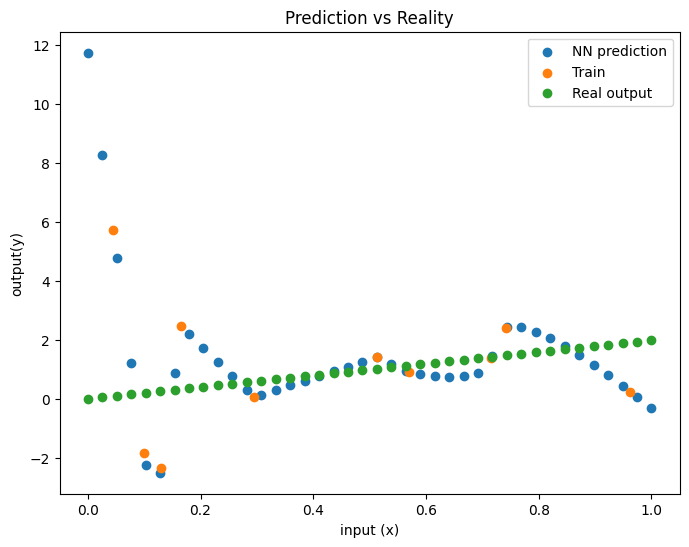

In [8]:
Y_real = 2*X_test

plt.figure(figsize=(8, 6))
plt.scatter(X_test.detach().numpy(),model(X_test).detach().numpy(), label="NN prediction")
plt.scatter(X.numpy(),Y.numpy(), label="Train")
plt.scatter(X_test.detach().numpy(),Y_real.detach().numpy(), label= "Real output")
plt.xlabel('input (x)')
plt.ylabel('output(y)')
plt.title('Prediction vs Reality')
plt.legend()
plt.show()

